# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Reading and Viewing the Data

In [3]:
income_data = pd.read_csv('happyscore_income.csv')
income_data


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


# Relationship Between Average Income and GDP

In [4]:
gdp = income_data['GDP']
income = income_data['avg_income']
#The highest GDP value is 1.564
gdp.max()
# The minimum GDP value is 0.0153
gdp.min()
print([gdp.max(),gdp.min()])
#For Maximum and Minimum Income
print([income.max(),income.min()])


[1.56391, 0.0153]
[26182.275, 572.88]


gdp_mean: 0.8419090990990992 income_mean: 6442.751416180183


Text(0, 0.5, 'INCOME')

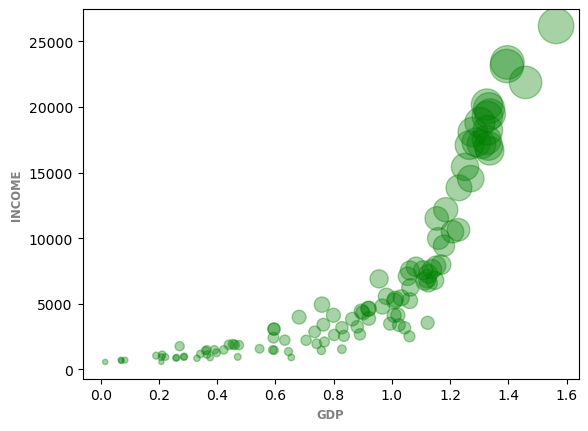

In [5]:
#Scatterplot with labels (Of Axes)
plt.scatter(gdp,income, alpha = 0.35, color = 'green', s = income*0.025)
gdp_mean = np.mean(gdp)
income_mean = np.mean(income)
print('gdp_mean:',gdp_mean, 'income_mean:', income_mean)
plt.xlabel('GDP', size='small', color='grey', weight='semibold')
plt.ylabel('INCOME', size='small', color='grey', weight='semibold')

#Note that the Sizes of the points increases with Increase in Income(High income big point and Low Income Small Point)

# Sorting, Filtering, and Plotting the Data
Wealthy Category (With labels of Highest and the Lowest Income Earners in the Wealthy Countries Category)

mean [19266.68075388889, 6442.75141618018]


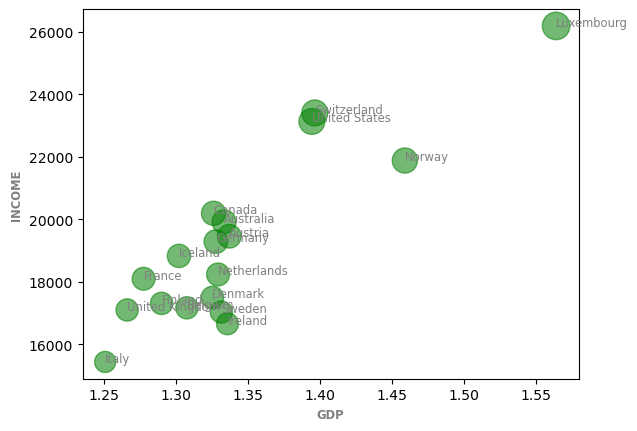

In [6]:
income_data = pd.read_csv('happyscore_income.csv')
income_data.sort_values('avg_income', inplace = True)
#Filter operaton for all the countries with an average_income greater than $15,000
wealthy = income_data[income_data['avg_income']>15000]
wealthy
#First 10 countries in this category
w = wealthy.iloc[0:10]
#Mean of the Average income in the Wealthy Category
wealthy_mean = np.mean(wealthy['avg_income'])
#Mean of the Average income for the whole data
data_mean = np.mean(income_data['avg_income'])
print('mean',[wealthy_mean,data_mean])
#Scatterplot (GDP against Avg Incoem in the Weathy Category) and Axes Labels
plt.scatter(wealthy['GDP'], wealthy['avg_income'], alpha = 0.55, color = 'green', s = wealthy['avg_income']*0.015)
plt.xlabel('GDP', size='small', color='grey', weight='semibold')
plt.ylabel('INCOME', size='small', color='grey', weight='semibold')
#Labeling the Countries 
#Labeling the Countries 
for k, row in wealthy.iterrows():
    plt.text(row['GDP'],
             row['avg_income'],
             row['country'], size = 'small', color='grey')
#The country with the Highest average income among the Wealthy Countries is Luxembourg (Also has the HIGHEST GDP per Capita)
#The country with the Lowest average income among the Wealthy Countries is Italy (Also has the Lowest GDP per Capita)

# Sorting, Filtering, and Plotting
Poor Category (With labels of Highest and the Lowest Income Earners in the Poor Countries Category)

mean [829.7666666666667, 6442.75141618018]


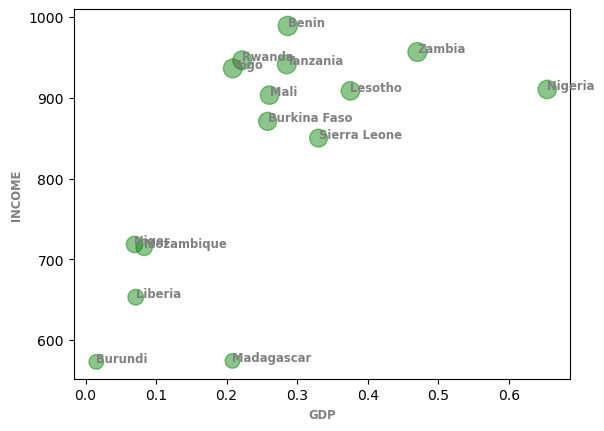

In [7]:
income_data.sort_values('avg_income', inplace = True)
#Filter operaton for all the countries with an average_income less than $1,000
poor = income_data[income_data['avg_income']<1000]
poor
#First 10 countries in this category
p = poor.iloc[0:10]
#Mean of the Average income in the Wealthy Category
poor_mean = np.mean(poor['avg_income'])
#Mean of the Average income for the whole data
data_mean = np.mean(income_data['avg_income'])
print('mean', [poor_mean,data_mean])
#Scatterplot (GDP against Avg Incoem in the Weathy Category) and Axes Labels
plt.scatter(poor['GDP'], poor['avg_income'], alpha = 0.45, color = 'green', s = poor['avg_income']*0.195)
plt.xlabel('GDP', size='small', color='grey', weight='semibold')
plt.ylabel('INCOME', size='small', color='grey', weight='semibold')
#Labeling the Countries 
for k, row in poor.iterrows():
    plt.text(row['GDP'],
             row['avg_income'],
             row['country'], size = 'small', color='grey', weight ='semibold')
#The country with the Highest average income among the Poor Countries is Benin (But not with the HIGHEST GDP per Capita)
#The country with the Lowest average income among the Poor Countries is Burundi (Also has the Lowest GDP per Capita)
#Although Nigeria has the Highest GDP it doesn't have the Highest Average Incoem In The Category

# Sorting, Filtering, and Plotting
Average and High Income Category (With labels of Highest and the Lowest Income Earners in the Category of Countries)

average_mean: 7319.780283291667 data_mean: 6442.75141618018


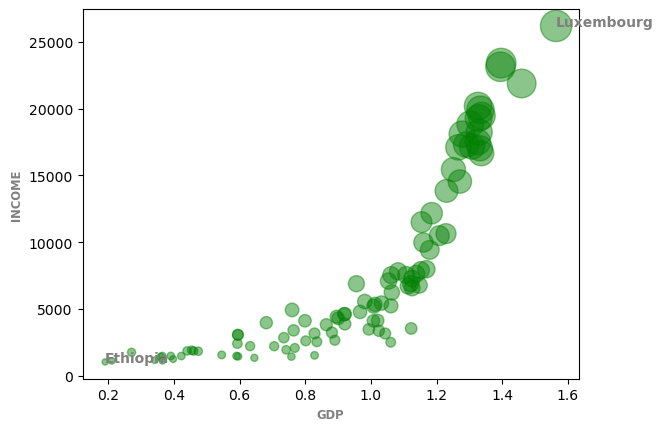

In [8]:
income_data.sort_values('avg_income', inplace = True)
#Filter operaton for all the countries with an average_income greater than $10,000
average = income_data[(income_data['avg_income'])>1000]
#country with the lowest average income
average.iloc[0]
#country with the Highest average income
average.iloc[-1]
#Scatterplot and labels of axes
plt.scatter(average['GDP'], average['avg_income'],  alpha = 0.45, color = 'green', s = average['avg_income']*0.0195)
plt.xlabel('GDP', size='small', color='grey', weight='semibold')
plt.ylabel('INCOME', size='small', color='grey', weight='semibold')
#Labeling the Countries with the Highest and Lowest Incomes in The Average Category
plt.text(average.iloc[0]['GDP'],
        average.iloc[0]['avg_income'],
        average.iloc[0]['country'], size='medium', color='grey', weight = 'semibold')
plt.text(average.iloc[-1]['GDP'],
        average.iloc[-1]['avg_income'],
        average.iloc[-1]['country'],size='medium', color='grey', weight = 'semibold')
# mean
average_mean = np.mean(average['avg_income'])
print('average_mean:', average_mean, 'data_mean:', data_mean)



In [9]:
# mean
average_mean = np.mean(average['avg_income'])
print('average_mean:', average_mean, 'data_mean:', data_mean)

average_mean: 7319.780283291667 data_mean: 6442.75141618018


# Normalizing the Data

In [10]:
mean = np.mean(income_data)
mean
std = np.std(income_data)
std
normed_data = (income_data-mean)/std
normed_data
normed_gdp = normed_data['GDP']
normed_income = normed_data['avg_income']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

# K-Means and Visualizing the Data
Scatterplot of gdp against Income (With Labels of Cluster Centers fo the Entire Dataset)

Text(-1.21992923, -0.7889247, 'Poor_Cluster')

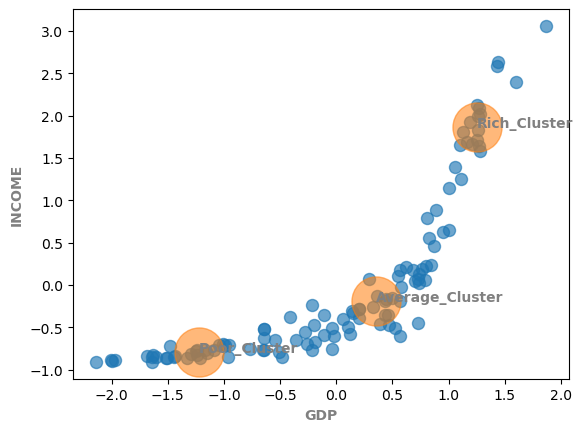

In [11]:
#Using Numpy to Select the Variable Columns that will be Arguments in the K-Means and Scatterplot Functions
gdp_income = np.column_stack((normed_gdp, normed_income))
gdp_income
#Running K-Means
km_results = KMeans(n_clusters=3).fit(gdp_income)
cluster = km_results.cluster_centers_
#Scatterplot With Clusters and Labels
plt.scatter(normed_gdp, normed_income, s = 75,  alpha=0.65)
plt.scatter(cluster[:,0], cluster[:,1], s=1250, alpha = 0.55)
plt.xlabel('GDP', size='medium', color='grey', weight='semibold')
plt.ylabel('INCOME', size='medium', color='grey', weight='semibold')
#Labeling the Cluster Centers
km_results.cluster_centers_
plt.text(1.25427537,  1.8608495, 'Rich_Cluster', size='medium', color='grey', weight='semibold')
plt.text(0.35467167, -0.18655898, 'Average_Cluster', size='medium', color='grey', weight='semibold')
plt.text(-1.21992923, -0.7889247, 'Poor_Cluster', size='medium', color='grey', weight='semibold')
#There are three Clusters of Countries (Wealthy, Average, and Poor)

# Elbow Plot 
(For Sum of Square Errors against the Range of K; 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[222.0,
 83.35918467257056,
 29.639788497265982,
 17.809988833222576,
 12.956659425019506,
 9.85231214371965,
 7.450517482822795,
 5.999526612679337,
 4.702662226171281]

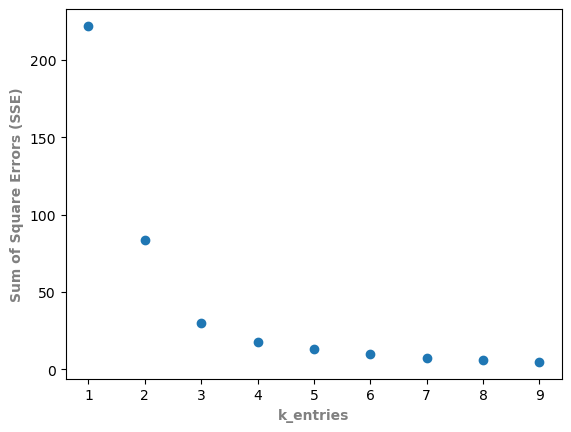

In [22]:
scaler = MinMaxScaler()
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(normed_data[['GDP','avg_income']])
    sse.append(km.inertia_)

plt.xlabel('k_entries', size='medium', color='grey', weight='semibold')
plt.ylabel('Sum of Square Errors (SSE)', size='medium', color='grey', weight='semibold')
plt.scatter(k_rng,sse,)
sse


# Correlation in Inequality and Satisfaction

mean_ineq: 38.41780505180179 mean_satisfaction: 5.93693693693694


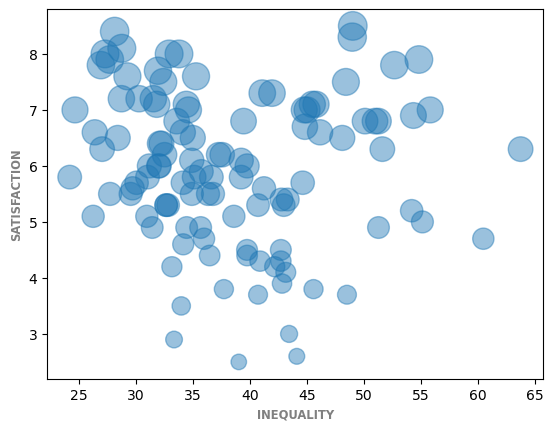

In [23]:
income_data.sort_values('avg_income', inplace = True)
inequality = income_data['income_inequality']
satisfaction = income_data['avg_satisfaction']
income = income_data['avg_income']
#Highest and Lowest Income
ineq_highest = inequality.max()
ineq_lowest = inequality.min()
#Highest and Lowest Satisfaction
satisfaction_highest = satisfaction.max()
satisfaction_lowest = satisfaction.min()
#ScatterPlot with labeled Axes
plt.scatter(inequality, satisfaction, alpha = 0.45, s = satisfaction*50)
plt.xlabel('INEQUALITY', size='small', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='small', color='grey', weight='semibold')
#Note that the Sizes of plots increses with increase in Satisfacion
#Mean Inequality and Satisfaction
mean_ineq = np.mean(income_data['income_inequality'])
mean_satisfaction= np.mean(income_data['avg_satisfaction'])
print('mean_ineq:', mean_ineq, 'mean_satisfaction:', mean_satisfaction)


# Sorting, Filtering, and Plotting the Data
Satisfied Category (With labels)


satisfied mean: 7.648000000000001 data_mean: 5.936936936936938


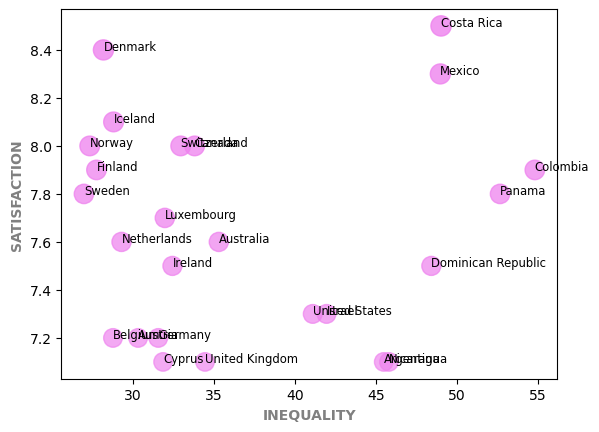

In [30]:
income_data = pd.read_csv('happyscore_income.csv')
income_data.sort_values('avg_satisfaction', inplace = True)
#Filter operaton for all the countries with an average satisfaction index greater than 7
satisfied = income_data[income_data['avg_satisfaction']>7]
satisfied
#First 10 countries in this category
s = satisfied.iloc[0:10]
#Mean of the Average Satisfaction in the Satisfied Category
satisfied_mean = np.mean(satisfied['avg_satisfaction'])
#Mean of the Average Satisfaction for the whole data
data_mean = np.mean(income_data['avg_satisfaction'])
print('satisfied mean:',satisfied_mean,'data_mean:', data_mean)
#Scatterplot (Average Income against Satisfaction in the Satisfied Category) and Axes Labels
plt.scatter(satisfied['income_inequality'], satisfied['avg_satisfaction'], alpha = satisfied['avg_satisfaction']*0.095, s = satisfied['avg_satisfaction']*25, color = 'violet')
plt.xlabel('INEQUALITY', size='medium', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='medium', color='grey', weight='semibold')
#Labeling the Countries 
#Labeling the Countries 
for k, row in satisfied.iterrows():
    plt.text(row['income_inequality'],
             row['avg_satisfaction'],
             row['country'], size = 'small', color='black')
#Some Countries have Low Inequaty and High Satisfaction Levels (Eg: Denmark, Swiss, Iceland, Norway, Fin, etc)
#Some Countries have Relatively High Inequality with High Satisfaction Levels (Eg: Costa Rica and Mexico)
#Some Countries have Low Inequality With Relatively Low Satisfaction (Eg: UK, Cyprus, Belgium , and Germany)
#Some countries have Relatively High Inequality with Low Satisfaction Levels (Eg: Argentina, Antigua, US, and Dominican)
#Most of the Countries in this Category Shows a negative correlation Between Inequality and Satisfaction

# Sotring, Filtering, and Visualizing 
Moderately Satisfied and Unsatisfied Category (With Labels)


moderate mean: 5.439534883720932 data mean: 5.936936936936938


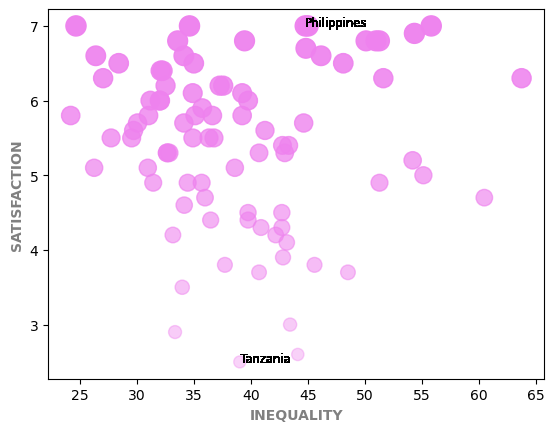

In [46]:
income_data = pd.read_csv('happyscore_income.csv')
income_data.sort_values('avg_satisfaction', inplace = True)
#Filter operaton for all the countries with an average satisfaction index less than or equal to 7
mod_satisfied = income_data[income_data['avg_satisfaction']<=7]
mod_satisfied
mod_ineq = mod_satisfied['income_inequality']
mod_ineq
#First 10 countries in this category
mod_satisfied.iloc[0:10]
#Mean of the Average Satisfaction in this Category
mod_satisfied_mean = np.mean(mod_satisfied['avg_satisfaction'])
#Mean of the Average Satisfaction for the whole data
data_mean = np.mean(income_data['avg_satisfaction'])
print('moderate mean:',mod_satisfied_mean,'data mean:', data_mean)
#Scatterplot (Average Income against Satisfaction in the Satisfied Category) and Axes Labels
plt.scatter(mod_satisfied['income_inequality'], mod_satisfied['avg_satisfaction'], alpha =  mod_satisfied['avg_satisfaction']*0.139, s =  mod_satisfied['avg_satisfaction']*30, color = 'violet')
plt.xlabel('INEQUALITY', size='medium', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='medium', color='grey', weight='semibold')
#Labeling the Countries 
#Labeling the Countries 
for k, row in mod_satisfied.iterrows():
    plt.text(mod_satisfied.iloc[0]['income_inequality'],
             mod_satisfied.iloc[0]['avg_satisfaction'],
             mod_satisfied.iloc[0]['country'], size = 'small', color='black')
    plt.text(mod_satisfied.iloc[-1]['income_inequality'],
             mod_satisfied.iloc[-1]['avg_satisfaction'],
             mod_satisfied.iloc[-1]['country'], size = 'small', color='black')
# Tz Has the Lowest Saitsfaction while Philippines has the Highest (Although Inequality is Higher than Tz)
# Most Countries with Low Inequality Have High Satisfaction
#Some Countries in this Category have High Inequality and High Satisfaction
    

# Normalization

In [47]:
mean = np.mean(income_data)
mean
std = np.std(income_data)
std
normed_data = (income_data-mean)/std
normed_data
normed_ineq = normed_data['income_inequality']
normed_satis = normed_data['avg_satisfaction']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

# Running K-Means and Visualizing Clusters

Text(-0.4439069, -0.20408749, 'Cluster_4')

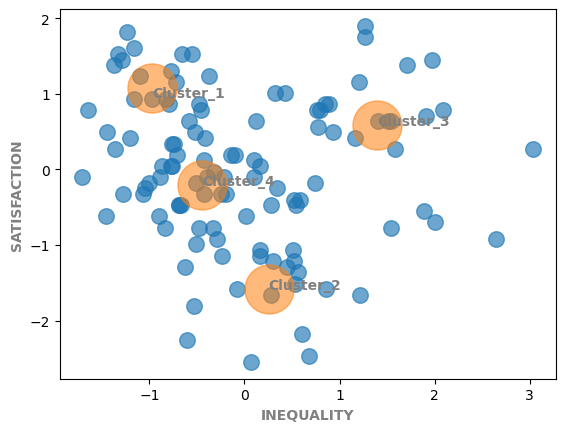

In [49]:
#Using Numpy to Select the Variable Columns that will be Arguments in the K-Means and Scatterplot Functions
ineq_satis = np.column_stack((normed_ineq, normed_satis))
ineq_satis
#Running K-Means
km_results = KMeans(n_clusters=4).fit(ineq_satis)
cluster = km_results.cluster_centers_
#Scatterplot With Clusters and Labels
plt.scatter(normed_ineq, normed_satis, s = 125,  alpha=0.655)
plt.scatter(cluster[:,0], cluster[:,1], s=1250, alpha = 0.545)
plt.xlabel('INEQUALITY', size='medium', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='medium', color='grey', weight='semibold')
#Labeling the Cluster Centers
CS =km_results.cluster_centers_
plt.text(-0.96850869,  0.95250548, 'Cluster_1', size='medium', color='grey', weight='semibold')
plt.text(0.25363092, -1.57870136, 'Cluster_2', size='medium', color='grey', weight='semibold')
plt.text(1.39155372,  0.58790615, 'Cluster_3', size='medium', color='grey', weight='semibold')
plt.text(-0.4439069 , -0.20408749, 'Cluster_4', size='medium', color='grey', weight='semibold')
# There are Four Clusters of Countries
# Cluster_1: Low Inequality with High Satisfaction
# Cluster_2: Relatively low Inequality with Very Low Satisfaction
# Clutsre_3: High Inequality with High Satisfaction
# Cluster_4: Moderate Inequality with Moderate Satisfaction



# Elbow Plot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[222.0,
 141.34649716548395,
 77.99480126125671,
 57.130786453323694,
 45.252012851002675,
 36.186664122441215,
 32.526413411780275,
 28.65773642495513,
 25.042596408275273]

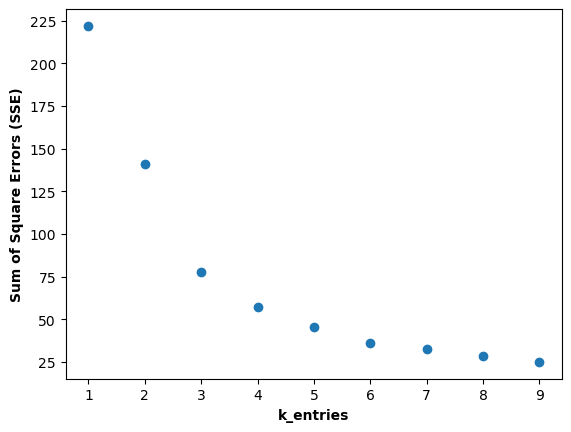

In [17]:
scaler = MinMaxScaler()
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(normed_data[['income_inequality','avg_satisfaction']])
    sse.append(km.inertia_)

plt.xlabel('k_entries', size='medium', color='black', weight='semibold')
plt.ylabel('Sum of Square Errors (SSE)', size='medium', color='black', weight='semibold')
plt.scatter(k_rng,sse,)
sse

# Checking Happiness Levels in GDP vs Income
Qn: How Happy are Countries with High (or low) Income and GDP?

gdp_mean: 0.8419090990990995 income_mean: 6442.751416180181 happiness_mean: 5.421909909909911


Text(0, 0.5, 'INCOME')

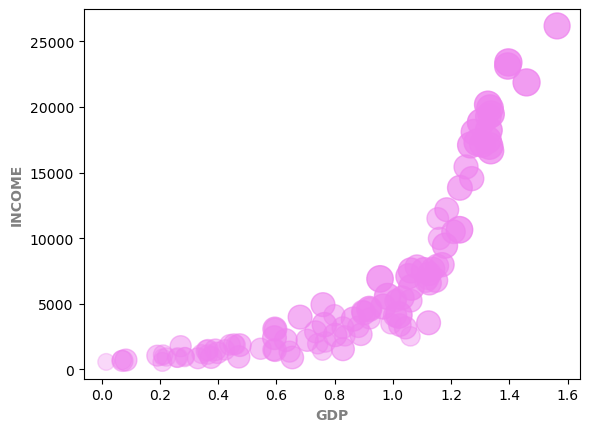

In [60]:
# Selecting the Parameters to Use
gdp = income_data['GDP']
income = income_data['avg_income']
happy = income_data['happyScore']
#Mean
gdp_mean = np.mean(gdp)
income_mean = np.mean(income)
happiness_mean = np.mean(happy)
print('gdp_mean:',gdp_mean, 'income_mean:', income_mean, 'happiness_mean:', happiness_mean)
# Scatterplot with labels (Of Axes)
plt.scatter(gdp,income, alpha = happy*0.105, color = 'violet', s = happy*50)
plt.xlabel('GDP', size='medium', color='grey', weight='semibold')
plt.ylabel('INCOME', size='medium', color='grey', weight='semibold')
# Sizes of the points increases with Increase in Happyscore(High Happyscore big point and Low Hapyscore Small Point)


# HappinessIn the Average and High Income Category

gdp_mean: 0.9722402222222223 income_mean: 7728.730657733334 happiness_mean: 5.730855555555556


Text(1.56391, 26182.275, 'Luxembourg')

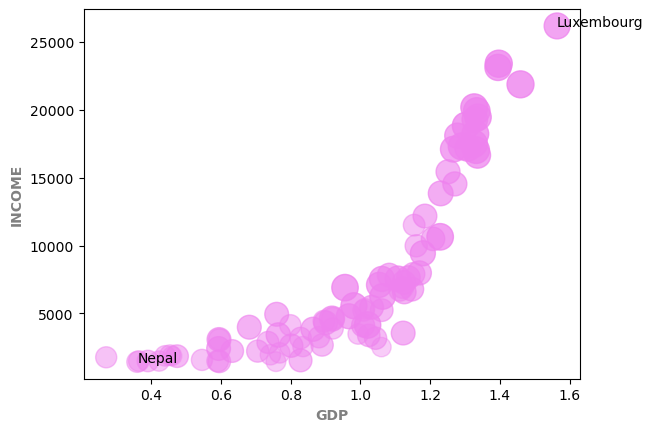

In [65]:
income_data.sort_values('avg_income', inplace = True)
#Filter operaton for all the countries with an average_income greater than $1400
average = income_data[(income_data['avg_income'])>1400]
Average_income = average['avg_income']
avg_gdp = average['GDP']
Happy = average['happyScore']
#country with the lowest average income
average.iloc[0]
#country with the Highest average income
average.iloc[-1]
#Means
Gdp_mean = np.mean(avg_gdp)
Income_mean = np.mean(Average_income)
Happiness_mean = np.mean(Happy)
print('gdp_mean:',Gdp_mean, 'income_mean:', Income_mean, 'happiness_mean:', Happiness_mean)
#Scatterplot and labels of axes
plt.scatter(average['GDP'], average['avg_income'], alpha = Happy*0.105, s = Happy*50, color = 'violet')
plt.xlabel('GDP', size='medium', color='grey', weight='semibold')
plt.ylabel('INCOME', size='medium', color='grey', weight='semibold')
#Labeling the Countries with the Highest and Lowest Incomes in The Average Category
plt.text(average.iloc[0]['GDP'],
        average.iloc[0]['avg_income'],
        average.iloc[0]['country'], size='medium', color='black')
plt.text(average.iloc[-1]['GDP'],
        average.iloc[-1]['avg_income'],
        average.iloc[-1]['country'],size='medium', color='black')

#Luxembourg with the Highest GPP and Income per Capita is the LARGEST and DARKEST Plot (Hence the HAPPIEST)
#Nepal with a Low GDP and Income per Capita is the SMALLEST and LEAST DARKEST Plot (Hence the LEAST HAPPIEST)
#Most High-Income and High-GDP Countries have LARGER & DARKER Plots, and Vice-Versa
#Hence in this Category Happiness Correlates Positively with GDP and Income

# Happiness In the Low Income Category

income mean: 931.4118095238096 gdp_mean: 0.28334714285714285 happiness_mean: 0.28334714285714285


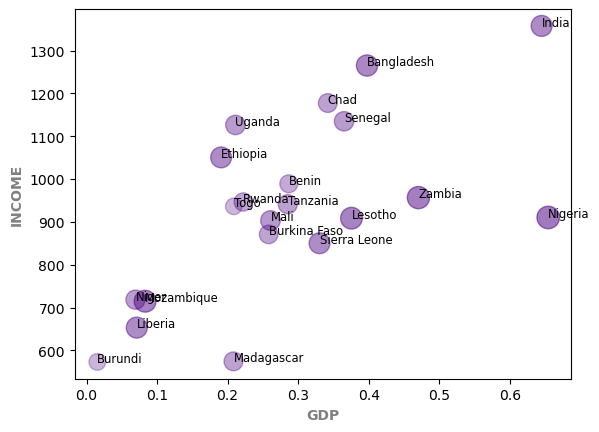

In [79]:
income_data.sort_values('avg_income', inplace = True)
#Filter operaton for all the countries with an average_income greater than $1,400
poor = income_data[income_data['avg_income']<=1400]
h_appy = poor['happyScore']
g_dp = poor['GDP']
#First 10 countries in this category
p = poor.iloc[0:10]
#Mean in the Low Income Category
Low_mean = np.mean(poor['avg_income'])
h_appy_mean = np.mean(h_appy)
g_dp_mean = np.mean(g_dp)
print('income mean:', Low_mean,'gdp_mean:',g_dp_mean, 'happiness_mean:',g_dp_mean )

#Scatterplot (GDP against Avg Incoem in the Weathy Category) and Axes Labels
plt.scatter(poor['GDP'], poor['avg_income'], alpha = h_appy*0.099, s = h_appy*50, color='indigo')
plt.xlabel('GDP', size='medium', color='grey', weight='semibold')
plt.ylabel('INCOME', size='medium', color='grey', weight='semibold')
#Labeling the Countries 
for k, row in poor.iterrows():
    plt.text(row['GDP'],
             row['avg_income'],
             row['country'], size = 'small', color='black')
#N
#India with the Highest GDP and Income per Capita is the LARGEST and Darkest Plot (Hence the Happiest)
#Burundi with the Lowest GDP and Income per Capita is the SMALLET and MOST PALE Plot (Hence the Least Happiest)
#Most High-Income and High-GDP Countries have LARGEST and DARKEST Plots, and Vice-Versa
#Hence in this Category Happiness Correlates Positively with GDP and Income

# Checking Happiness Levels in Inequality vs Satisfaction
Qn: How Happy are Countries with High (or low) Inequality and Satisfaction Index?

Mean_inequality: 38.41780505180179 Mean_satisfaction: 5.93693693693694 Mean_happiness: 5.421909909909911


Text(0, 0.5, 'SATISFACTION')

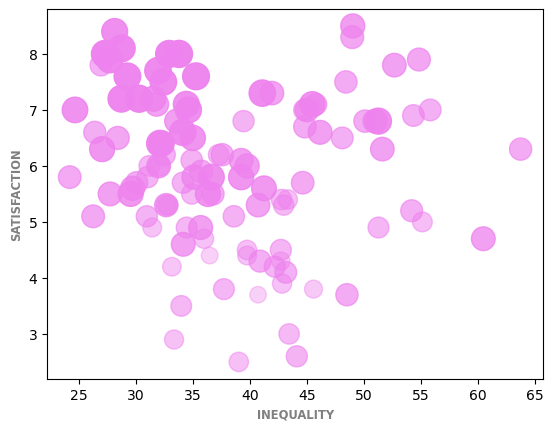

In [75]:
income_data.sort_values('avg_income', inplace = True)
inequality = income_data['income_inequality']
satisfaction = income_data['avg_satisfaction']
income = income_data['avg_income']
#Means
Mean_inequality = np.mean(inequality)
Mean_satisfaction = np.mean(satisfaction)
Mean_happiness = np.mean(happy)
print('Mean_inequality:', Mean_inequality, 'Mean_satisfaction:', Mean_satisfaction, 'Mean_happiness:', Mean_happiness)
#Highest and Lowest Income
ineq_highest = inequality.max()
ineq_lowest = inequality.min()
#Highest and Lowest Satisfaction
satisfaction_highest = satisfaction.max()
satisfaction_lowest = satisfaction.min()
#ScatterPlot with labeled Axes
plt.scatter(inequality, satisfaction, alpha = happy*0.129, s = happy*50, color = 'violet')
plt.xlabel('INEQUALITY', size='small', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='small', color='grey', weight='semibold')
#Note that the Sizes and Colors of plots increses with increase in Happiness
#The Least Unequal Countries are the Most Satisfied and Have the LARGEST and DEEPEST COLORED plots (Hence HAPPIEST)
#The Least Satisfied Countries have Moderate Inequality and Have the SMALLEST and LIGHTEST COLORED Plots (Hence LEAST HAPPIEST)
#Some Countries Have High Satisfaction despite Being Highly Unequal. They are also Quite Happy

# Happiness in the Most Satisfied Category

Mean_inequality: 36.258285147142864 Mean_satisfaction: 7.971428571428571 Mean_happiness: 7.262714285714286


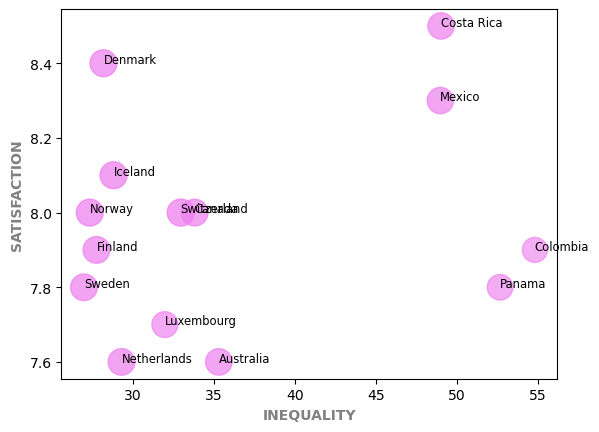

In [80]:
income_data = pd.read_csv('happyscore_income.csv')
income_data.sort_values('avg_satisfaction', inplace = True)
#Filter operaton for all the countries with an average satisfaction index greater than 7.5
satisfied = income_data[income_data['avg_satisfaction']>7.5]
HAPPY = satisfied['happyScore']
#Means
MEan_inequality = np.mean(satisfied['income_inequality'])
MEan_satisfaction = np.mean(satisfied['avg_satisfaction'])
MEan_happiness = np.mean(satisfied['happyScore'])
print('Mean_inequality:', MEan_inequality, 'Mean_satisfaction:', MEan_satisfaction, 'Mean_happiness:', MEan_happiness)
#First 10 countries in this category
s = satisfied.iloc[0:10]
#Scatterplot (Average Income against Satisfaction in the Satisfied Category) and Axes Labels
plt.scatter(satisfied['income_inequality'], satisfied['avg_satisfaction'], alpha = HAPPY*0.099, s = HAPPY*50, color = 'violet')
plt.xlabel('INEQUALITY', size='medium', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='medium', color='grey', weight='semibold')
#Labeling the Countries 
#Labeling the Countries 
for k, row in satisfied.iterrows():
    plt.text(row['income_inequality'],
             row['avg_satisfaction'],
             row['country'], size = 'small', color='black')
#The SIZES and COLORS of the Plots are Amlost Equal; Hence Most Low-Inequality High-Satisfaction Coutries are Quite Happy
#Panama and Colombia have Highest Inequality, Least Satisfaction and are the Least Happy in the Category
#Denmark Has the Least Inequality and Very High Satisfaction and Appears to be the Happiest in the Category
#Costa Rica and Mexico Have Relatively High Satisfaction and Inequality; appears to be Very Happy as Well

# Hapiness in the Moderate and Least Satisfied Countries

Mean_inequality: 38.729488337010295 Mean_satisfaction: 5.643298969072167 Mean_happiness: 5.156226804123712


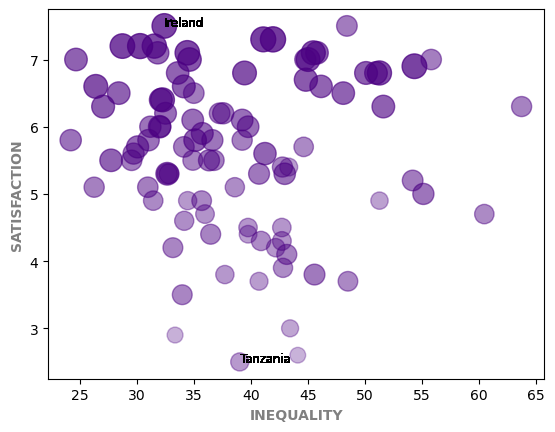

In [83]:
income_data = pd.read_csv('happyscore_income.csv')
income_data.sort_values('avg_satisfaction', inplace = True)
#Filter operaton for all the countries with an average satisfaction index less than or equal to 7.5
mod_satisfied = income_data[income_data['avg_satisfaction']<=7.5]
ha_ppy = mod_satisfied['happyScore']
#Means
mEan_inequality = np.mean(mod_satisfied['income_inequality'])
mEan_satisfaction = np.mean(mod_satisfied['avg_satisfaction'])
mEan_happiness = np.mean(mod_satisfied['happyScore'])
print('Mean_inequality:', mEan_inequality, 'Mean_satisfaction:', mEan_satisfaction, 'Mean_happiness:', mEan_happiness)
#First 10 countries in this category
mod_satisfied.iloc[0:10]
#Scatterplot (Average Income against Satisfaction in the Satisfied Category) and Axes Labels
plt.scatter(mod_satisfied['income_inequality'], mod_satisfied['avg_satisfaction'], alpha = ha_ppy*0.106, s = ha_ppy*45, color = 'indigo')
plt.xlabel('INEQUALITY', size='medium', color='grey', weight='semibold')
plt.ylabel('SATISFACTION', size='medium', color='grey', weight='semibold')
#Labeling the Countries 
#Labeling the Countries 
for k, row in mod_satisfied.iterrows():
    plt.text(mod_satisfied.iloc[0]['income_inequality'],
             mod_satisfied.iloc[0]['avg_satisfaction'],
             mod_satisfied.iloc[0]['country'], size = 'small', color='black')
    plt.text(mod_satisfied.iloc[-1]['income_inequality'],
             mod_satisfied.iloc[-1]['avg_satisfaction'],
             mod_satisfied.iloc[-1]['country'], size = 'small', color='black')
# In this Category:
# Most Countries with high Satisfaction and low Inequality are the HAPPIEST (Have the LARGEST and DEEPEST COLORED Plots)
# Most Countries with low Satisfaction and Moderate Inequality are the LEAST HAPPIEST (Have the SMALLEST and LIGHTEST COLORED Plots)
# Tz Has the Lowest Satisfaction with the SMALLEST and LIGHTEST COLORED Plot (Hence RELATIVELY UNHAPPY)
#Ireland has the Highest Satisfaction with the LARGEST and DEEPEST COLORED Plots (Hence the HPPIEST)


    